# Part I - (Dataset Exploration Title)
## by (Bill Clinton Ogot)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The data was downloaded from https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv. The data required multiple data files to be joined for wrangling and cleaning.



## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import io
import os

%matplotlib inline

In [2]:
# downloading the dataset programatically using requets
folder_name = "ogot"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
response = requests.get(url)

In [3]:
# writing the contentinto the file in the directory
with open(os.path.join(folder_name, url.split('/')[-1]), mode="wb") as file:
    file.write(response.content)

In [4]:
# listing to see if the dataset was downloaded
os.listdir(folder_name)

['201902-fordgobike-tripdata.csv', 'fordgobike01.csv']

In [5]:
# reading the dataset
df = pd.read_csv(os.path.join(folder_name, "201902-fordgobike-tripdata.csv"))

In [6]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [7]:
# saving the dataset without the index column
df.to_csv(os.path.join(folder_name, "fordgobike01.csv"), index=False)

In [8]:
# checking to see f the dataset is saved correcly
df1 = pd.read_csv(os.path.join(folder_name, "fordgobike01.csv"))
df1.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [9]:
df1.shape

(183412, 16)

In [10]:
df1.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
149180,212,2019-02-06 19:51:36.5370,2019-02-06 19:55:08.6460,243.0,Bancroft Way at College Ave,37.869360,-122.254337,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,529,Customer,NaN,NaN,No
40200,944,2019-02-22 21:45:45.2830,2019-02-22 22:01:29.8380,365.0,Turk St at Fillmore St,37.780450,-122.431946,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,5322,Subscriber,1999.0,Male,No
59067,1508,2019-02-20 21:01:27.8260,2019-02-20 21:26:36.7010,200.0,2nd Ave at E 18th St,37.800214,-122.253810,210.0,45th St at Manila,37.833294,-122.256224,5165,Subscriber,1992.0,Female,No
74780,391,2019-02-19 09:47:36.7570,2019-02-19 09:54:08.6910,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,190.0,West St at 40th St,37.830223,-122.270950,5403,Subscriber,1991.0,Male,No
179879,208,2019-02-01 12:39:58.6540,2019-02-01 12:43:26.8610,75.0,Market St at Franklin St,37.773793,-122.421239,356.0,Valencia St at Clinton Park,37.769188,-122.422285,1808,Subscriber,1962.0,Male,Yes
68412,620,2019-02-19 22:53:15.1810,2019-02-19 23:03:35.4890,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,16.0,Steuart St at Market St,37.794130,-122.394430,5329,Subscriber,1997.0,Male,No
169299,385,2019-02-04 11:13:54.5130,2019-02-04 11:20:20.4560,310.0,San Fernando St at 4th St,37.335885,-121.885660,286.0,San Carlos St at 11th St,37.336466,-121.876613,4026,Subscriber,1947.0,Female,No
142159,511,2019-02-07 17:21:14.4300,2019-02-07 17:29:46.1630,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,250.0,North Berkeley BART Station,37.873558,-122.283093,241,Customer,1970.0,Male,No
111051,954,2019-02-12 17:19:17.3240,2019-02-12 17:35:12.0500,355.0,23rd St at Tennessee St,37.755367,-122.388795,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5246,Customer,1994.0,Male,No
135946,355,2019-02-08 11:11:47.1150,2019-02-08 11:17:43.0100,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,5162,Subscriber,NaN,NaN,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [12]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
# checking how many strips have the minimum duration of 60 sec
df1[df1["duration_sec"] <= 60].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
# getting the 10 trips with the larget duration
df1.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


In [15]:
# sum of the missing values
df1.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [16]:
# geting the number of users under each category
df1['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [17]:
# creating the copy of the data
clean_df1 = df1.copy()

In [18]:
# droping the unecessary column headers
clean_df1.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [19]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [20]:
# clean_df1['start_time', 'end_time'] = clean_df1['start_time', 'end_time'].apply(pd.to_datetime)
# converting start_time and end_time columns to datetime
clean_df1.start_time = pd.to_datetime(df.start_time)
clean_df1.end_time = pd.to_datetime(df.end_time)

In [21]:
# change the data type for bike_share_for_all_trip to be bool
clean_df1.bike_share_for_all_trip = (clean_df1.bike_share_for_all_trip == 'Yes')

In [22]:
# verifying to see if all the data type are correct
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 15.6+ MB


### What is the structure of your dataset?

> The fordgobike dataset has about 183412 rows and 16 columns. The colmns are compost of different datypes for example; numerical, datetime, object and boolean. Some of the colums are are follows; duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year and much more.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to find out weather the trip duration is depenedent to other variables such as age, gender and start_station.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the features i think will support my investigation are start_station, user_type, ageand gender. For example gender is more likely to affect Duration_sec

## Univariate Exploration 


> What is the relationship between trip_number and duration_sec ?

In [23]:
# plotting the duration_sec in a histogram
n_duration = clean_df1["duration_sec"].value_counts().sum()
max_value = clean_df1.shape[0]
min_value = clean_df1.duration_sec[0]
average = max_value/min_value
print(average)

3.51464980358


In [24]:
tick_props = np.arange(0.1, average, 0.4)
tick_name = ['{:0.2f}'.format(v) for v in tick_props]

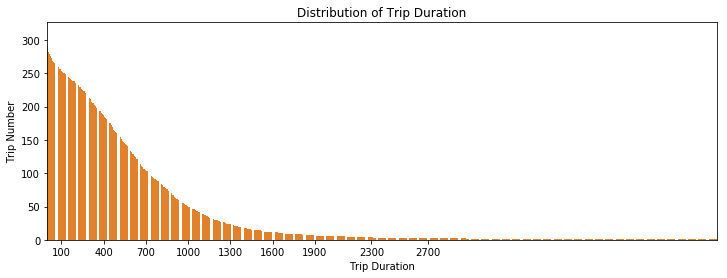

In [25]:
order = clean_df1['duration_sec'].value_counts().index
base_color = sb.color_palette()[1]
plt.figure(figsize=[12, 4])
g = sb.countplot(data = clean_df1, x = "duration_sec", color=base_color, order=order);
g.set_xticks([100, 400, 700, 1000, 1300, 1600, 1900, 2300, 2700])
_ = g.set_xticklabels(["100", "400", "700", "1000", "1300", "1600", "1900", "2300", "2700"])
plt.xlabel("Trip Duration")
plt.ylabel("Trip Number")
plt.title("Distribution of Trip Duration")
plt.show()

> As we can see from the count plots of Trip_duration and Trip_number, as the trip_duration increases, the number of trips reduces

> Is there corrolation between trip_number and duration_sec?

In [ ]:
# creating the hit to visualize the trip duration distriution
plt.figure(figsize=[20,5])
plt.subplot(1 ,2 ,1)
color = sb.color_palette()[1]
bins = np.arange(0, clean_df1.duration_sec.max()+600, 600)
plt.hist(data = clean_df1, x = 'duration_sec', bins=bins, color=color)
plt.xlim((-500, 10000))
plt.xlabel('Duration (Duration_sec)')
plt.ylabel('Trip Number')
plt.title('Distribution of Trip (Duration_sec)');


plt.subplot(1 ,2 ,2)
color = sb.color_palette()[1]
bins = np.arange(0, clean_df1.duration_sec.max()+200, 200)
plt.hist(data = clean_df1, x = 'duration_sec', bins=bins, color=color)
plt.xlim((-500, 10000))
plt.xlabel('Duration (Duration_sec)')
plt.ylabel('Trip Number')
plt.title('Distribution of Trip (Duration_sec)');

> From the above plotted hist, we can see that as the duration_sec increases, there are fewer trip numbers. Most of the groups have a duration_sec ranging from 600 to 1000 duration_sec.

In [27]:
clean_df1["duration_sec"].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [28]:
applied_log = np.log10(clean_df1.duration_sec.min())
applied_log

1.7853298350107671

> Does he trip_number decrease by decrease in duration_sec ?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


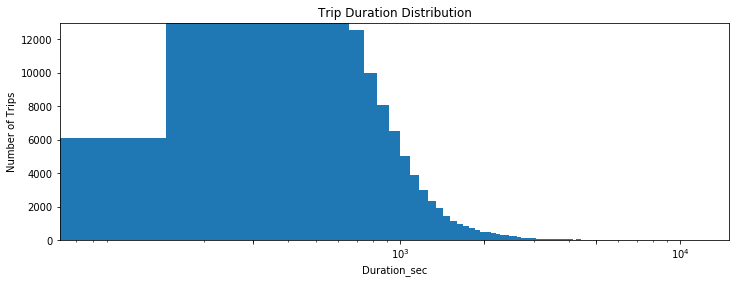

In [29]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 1000
bins_log = 10 ** np.arange(applied_log, np.log10(clean_df1['duration_sec'].max()) + bins, bins)

plt.figure(figsize=[12, 4])
plt.hist(data = clean_df1, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([300, 1e3, 2e3, 5e3, 1e4])
plt.xlim((0, 15000))
plt.ylim((0, 13000))
plt.show()

> From the plotted hist we see long tail in the distribution, therefore, its appropriate to use a log scale for the bins.

In [41]:
clean_df1.replace(np.nan, 0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,0.0,0,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,False
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,False
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,False
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,False
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,False


In [48]:
clean_df1.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> Which start_station_id has the highest number of users ?

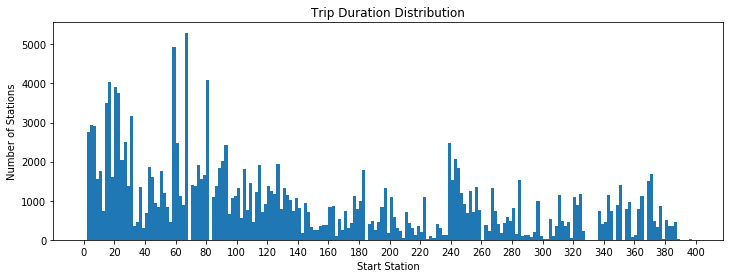

In [58]:
# ploting the start_station_id hist
converted_start_station_id = clean_df1['start_station_id'].astype(float)
bins = np.arange(0, clean_df1['start_station_id'].max()+2.0, 2.0)
plt.figure(figsize=[12, 4])
plt.xticks(range(0, 800, 20))
plt.hist(clean_df1["start_station_id"].dropna().values, bins=bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

> From the ploted hist, we can see that some start_station_id have upto about 6000 registared users.

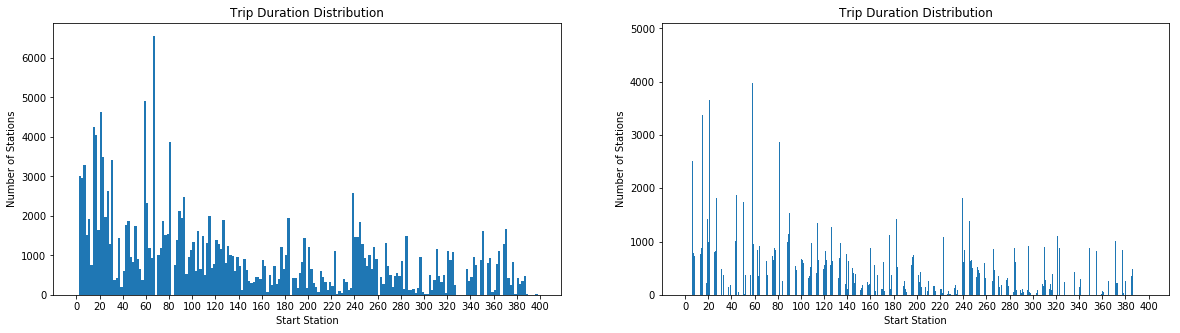

In [64]:
# Plotting start station id distribution on a standard scale
plt.figure(figsize=[20,5])
plt.subplot(1 ,2 ,1)
converted_start_station_id = clean_df1['end_station_id'].astype(float)
bins = np.arange(0, converted_start_station_id.max()+2.0, 2.0)
plt.xticks(range(0, 800, 20))
plt.hist(clean_df1["end_station_id"].dropna().values, bins=bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')


plt.subplot(1 ,2 ,2)
color = sb.color_palette()[1]
converted_start_station_id = clean_df1['end_station_id'].astype(float)
bins = np.arange(0, converted_start_station_id.max()+0.5, 0.5)
plt.xticks(range(0, 800, 20))
plt.hist(clean_df1["end_station_id"].dropna().values, bins=bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations');

> From the above hist ploted as sub plots, in the firs hist, we use a relatively bigger bins edges while the other plot we introduce noice in order to virsualize the data.

> When was most users born ?

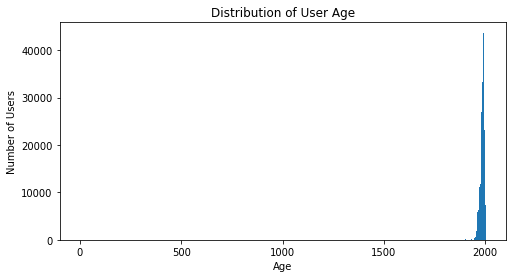

In [76]:
# Plotting age distribution derived from member's birth year.
dtype_convert = clean_df1['member_birth_year'].astype(float)
bins = np.arange(0, dtype_convert.max()+4.5, 4.5)

plt.figure(figsize=[12, 4])
plt.xticks(range(0, 8000, 500))
plt.hist(data = clean_df1.dropna(), x = 'member_birth_year', bins = bins)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

> When the member_birth_year is ploted, the hist is skewed to the left which most members born in between 1995 and 2000

> Which subscibers type has the maximum number of members ?

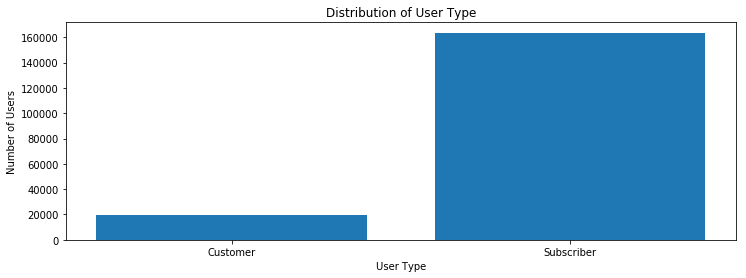

In [38]:
# plotting types of users 
plt.figure(figsize=[12,4])
get_keys_user_type = clean_df1['user_type'].value_counts().keys()
value_counts_for_user_type = clean_df1['user_type'].value_counts()
plt.bar(x = get_keys_user_type, height =  value_counts_for_user_type)
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

> When a bar plot is ploted for user_type, then subscibers are many as compared to customers.

> Which gender has the maximum numbers of users ?

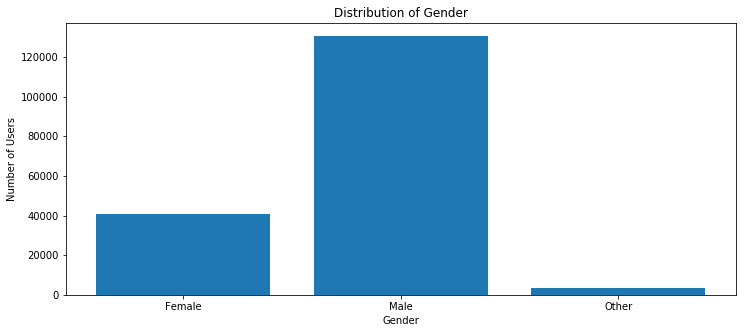

In [39]:
# plotting genders 
plt.figure(figsize=[12,4])
get_keys_member_gender = clean_df1['member_gender'].value_counts().keys()
value_counts_for_member_gender = clean_df1['member_gender'].value_counts()
plt.bar(x = get_keys_member_gender, height = value_counts_for_member_gender)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

> when a bar plot for member_gender is ploted, males are many as compared to others and females

> Does age affect trip duration ?

Text(0.5,1,'Scatter plots for member_birth_year and duration_sec')

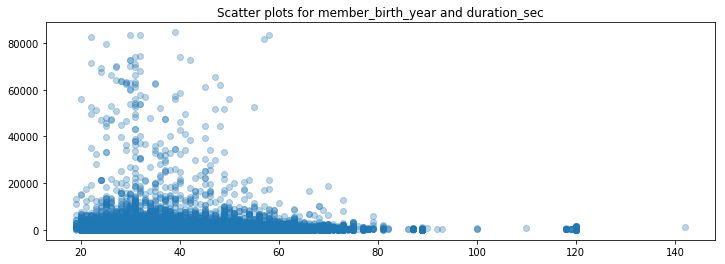

In [78]:
# Scatter plots for member_birth_year and duration_sec
plt.figure(figsize=[12,4])
plt.scatter((2020 - clean_df1.member_birth_year), clean_df1['duration_sec'], alpha = 0.30 );
plt.title('Scatter plots for member_birth_year and duration_sec');

> From the plot, we can see that most elder people have less trip duration as compared to younger users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration takes six hundred seconds to ahieve a higher peak values where the large amount of values are concentrated. the peak value starts at zero then drips until there is no peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The year feature is derived from sunstructing the surrent year to get the age distribution which gives a better perception of the distribution. In order to virsualize the bike traffic for a certain stations, thestart stations and the end station is plotted on a lagger plot.

## Bivariate Exploration

> This is where I explore the relationship between two pairs of the variables or features.

> Does age affect trip duration ?

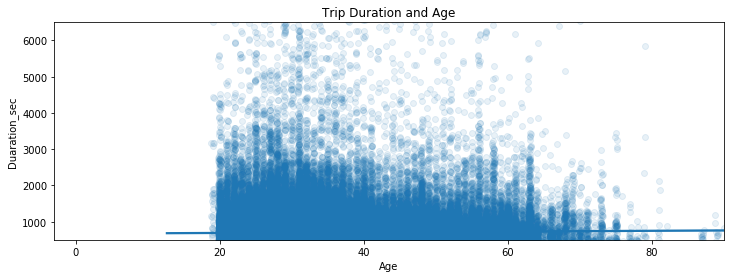

In [30]:
# As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.
plt.figure(figsize=[12, 4])
sb.regplot((2020 - clean_df1['member_birth_year']), clean_df1['duration_sec'], x_jitter = 0.2, scatter_kws = {'alpha' : 1/10})
plt.axis([-3, 90, 500, 6500])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec');


> As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.

In [50]:
df2 = clean_df1.dropna()

In [59]:
df2[['member_birth_year', 'duration_sec']].describe()

,member_birth_year,duration_sec
count,174952.000000,174952.000000
mean,1984.803135,704.002744
std,10.118731,1642.204905
min,1878.000000,61.000000
25%,1980.000000,323.000000
50%,1987.000000,510.000000
75%,1992.000000,789.000000
max,2001.000000,84548.000000


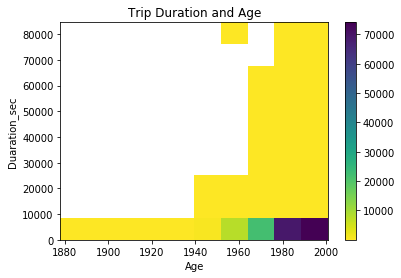

In [67]:
# As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.plt.figure(figsize=[12, 4])
plt.figure(figsize = [12, 4])
plt.hist2d(data = df2, x = 'member_birth_year', y = 'duration_sec', cmin = 0.7, cmap = 'viridis_r')
plt.colorbar();
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec');
plt.show()

> As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.

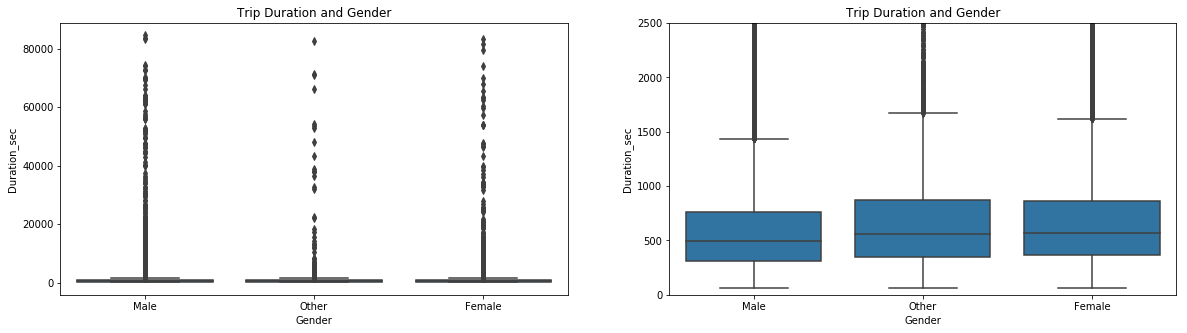

In [68]:
# ploting the boxplot for the member_gender and the duration_sec
plt.figure(figsize = [20, 4])
plt.subplot(1 ,2 ,1)
base_color = sb.color_palette()[0]
sb.boxplot(data = clean_df1, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')


# ploting the boxplot for the member_gender and the duration_sec
plt.subplot(1 ,2 ,2)
base_color = sb.color_palette()[0]
sb.boxplot(data = clean_df1, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and Gender')
plt.ylim([-1, 2500])
plt.xlabel('Gender')
plt.ylabel('Duration_sec');


> The ploted boxplots also indicates that males coves a longer duration_sec as compared to females and others

In [ ]:
# ploting member_gender and member_birth_year on a facetgrid
bins = np.arange(1900, 2000+20, 20)
g = sb.FacetGrid(data = clean_df1, col = 'member_gender', col_wrap = 2);
g.map(plt.hist, 'member_birth_year', bins=bins);

> The ploted facetgrid also indicates that males coves a longer duration_sec as compared to females and others

> Which member_gender takes the shottest time to reach the end_sation_id ?

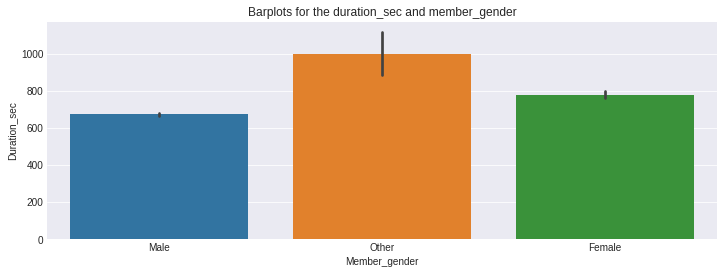

In [26]:
# plotting a parplot to visualize member_gender and the duration_sec
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=[12, 4])
sb.barplot(data = clean_df1, y = clean_df1.duration_sec, x = clean_df1.member_gender)
plt.xlabel("Member_gender")
plt.ylabel("Duration_sec")
plt.title("Barplots for the duration_sec and member_gender")
plt.show()

> From the ploted barplot above, Male takes shotter duration to reach the end_station folowerd byFemales then Others

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> What i observed from the plots is that age is dependent on the trip duration for example the trip duration increases as the participant gets older. On the other hand, start station and end station doesnt determine the trip duration hence they are independent to the trip duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was thinking that variables such as user type and gender should have higher values in order to achieve higher trip duration but this was the inverse. 

## Multivariate Exploration

> Futher data exploation.

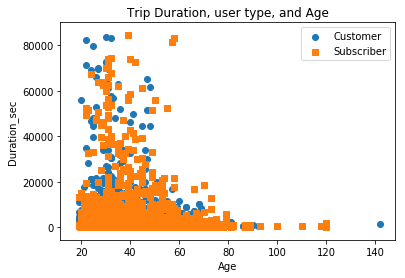

In [58]:
plt.figure(figsize = [12, 4])
marks_for_user_types = [['Customer', 'o'],['Subscriber', 's']]
for user_type, marker in marks_for_user_types:
    df001_user_type = clean_df1[clean_df1['user_type'] == user_type]
    plt.scatter((2020 - df001_user_type['member_birth_year']), df001_user_type['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

> The ploted scatter plots also indicates that males coves a longer duration_sec as compared to females and others

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that even though the percentage of men is higher but percentage of women in the trip duration is higher.

### Were there any interesting or surprising interactions between features?

> There were some interesting interaction between features such as for the subscibers their strp duration was higher than customers for older age.

## Conclusions

> From the above visualizations i have able to see that trip duration is dependable to some features such as age. As the subscibers and customers become older the trip duration reduces.

> Both customer and suscribers are showing a simmilar trend for some variables such as age, duration, and user_type.
